### **Description**
#### **Data Description:**

You are provided with a dataset  of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique  id.  The  dataset  comprises  12  plant  species.  The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.


#### **Dataset:**
The dataset can be download from Olympus.The data file names are:
* images.npy
* Label.csv


#### **Context:**
Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, hasrecently released a dataset containing images of unique plants belonging to 12 species at several growth stages


#### **Objective:**
To implement the techniques learnt as a part of the course.

#### **Learning Outcomes:**
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing the libraries**

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.preprocessing.image import ImageDataGenerator


### **Importing the Data Files**

In [3]:
images = np.load("/content/drive/MyDrive/Colab Notebooks/Data/Introduction to Computer Vision/Project 8/images.npy")
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Introduction to Computer Vision/Project 8/Labels.csv")

In [4]:
images.shape

(4750, 128, 128, 3)

4750 images with 128 x 128 shape and 3 (RGB) colors.

In [5]:
labels.shape

(4750, 1)

4750 labels for each images.

In [6]:
plant_count = labels['Label'].value_counts()
plant_count

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

12 different classification of plant seedlings.

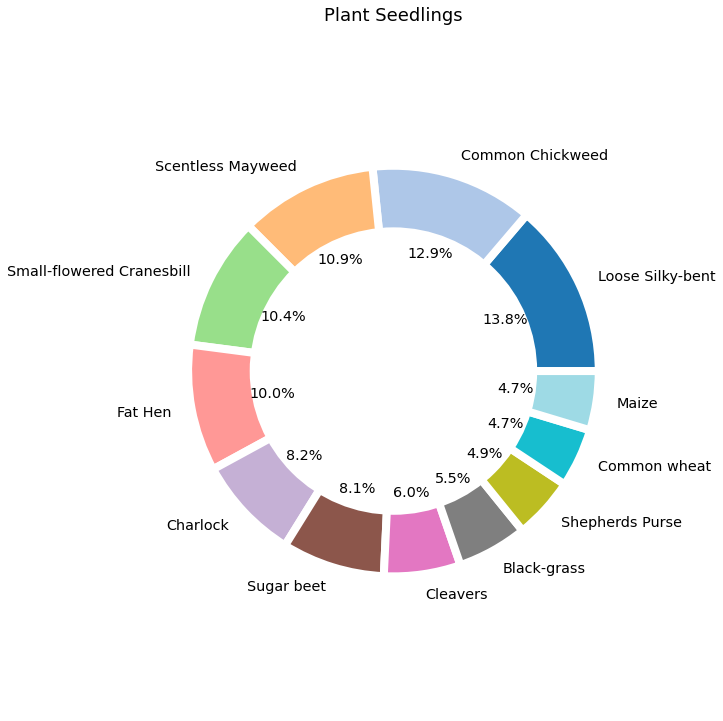

In [7]:
# create the pie chart
ax = plant_count.plot(kind = 'pie', figsize=(10, 10),  autopct='%.1f%%',
       wedgeprops={'linewidth': 8.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, colormap = 'tab20')

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
ax.add_artist(centre_circle)
plt.axis("equal")
plt.tight_layout()

ax.set_ylabel(None)
ax.set_title('Plant Seedlings', fontsize=18)
plt.show()

Top 3 plants are 'Loose Silky-bent', 'Common Chickweed' and 'Scentless Mayweed'

#### Seperate plant seedlings

In [8]:
Loose_Silky_bent_imgs = []
Common_Chickweed_imgs = []
Scentless_Mayweed_imgs = []
Small_flowered_Cranesbill_imgs = []
Fat_Hen_imgs = []
Charlock_imgs = []
Sugar_beet_imgs = []
Cleavers_imgs = []
Black_grass_imgs = []
Shepherds_Purse_imgs = []
Common_wheat_imgs = []
Maize_imgs = []

i = 0
while i < labels.shape[0]:
  if labels['Label'][i] == "Loose Silky-bent":
    Loose_Silky_bent_imgs.append(images[i])
  if labels['Label'][i] == "Common Chickweed":
    Common_Chickweed_imgs.append(images[i])
  if labels['Label'][i] == "Scentless Mayweed":
    Scentless_Mayweed_imgs.append(images[i])
  if labels['Label'][i] == "Small-flowered Cranesbill":
    Small_flowered_Cranesbill_imgs.append(images[i])
  if labels['Label'][i] == "Fat Hen":
    Fat_Hen_imgs.append(images[i])
  if labels['Label'][i] == "Charlock":
    Charlock_imgs.append(images[i])
  if labels['Label'][i] == "Sugar beet":
    Sugar_beet_imgs.append(images[i])
  if labels['Label'][i] == "Cleavers":
    Cleavers_imgs.append(images[i])
  if labels['Label'][i] == "Black-grass":
    Black_grass_imgs.append(images[i])
  if labels['Label'][i] == "Shepherds Purse":
    Shepherds_Purse_imgs.append(images[i])
  if labels['Label'][i] == "Common wheat":
    Common_wheat_imgs.append(images[i])
  if labels['Label'][i] == "Maize":
    Maize_imgs.append(images[i])

  i += 1

#### Ploting the images from each class

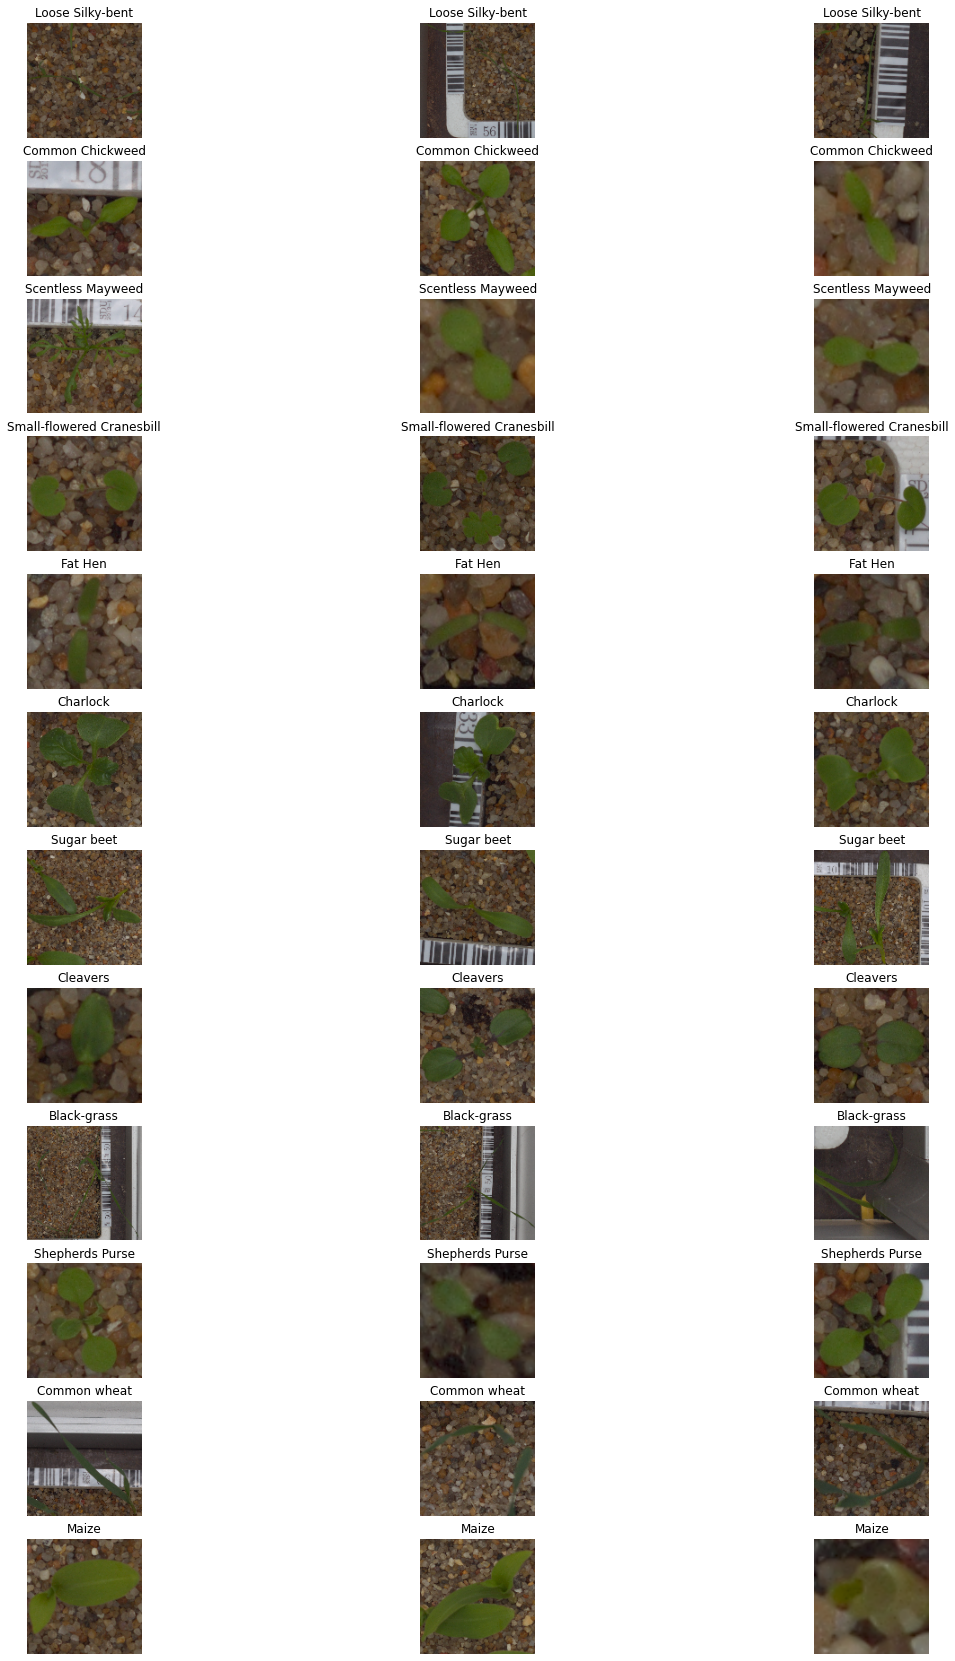

In [9]:
fig, axs = plt.subplots(12,3, figsize = (20,30))

axs = axs.ravel()
for i in range(3):
  axs[i].imshow(cv2.cvtColor(Loose_Silky_bent_imgs[i], cv2.COLOR_BGR2RGB))
  axs[i].set_title("Loose Silky-bent")
  axs[i].axis('off')

  axs[3+i].imshow(cv2.cvtColor(Common_Chickweed_imgs[i], cv2.COLOR_BGR2RGB))
  axs[3+i].set_title("Common Chickweed")
  axs[3+i].axis('off')
  
  axs[6+i].imshow(cv2.cvtColor(Scentless_Mayweed_imgs[i], cv2.COLOR_BGR2RGB))
  axs[6+i].set_title("Scentless Mayweed")
  axs[6+i].axis('off')
  
  axs[9+i].imshow(cv2.cvtColor(Small_flowered_Cranesbill_imgs[i], cv2.COLOR_BGR2RGB))
  axs[9+i].set_title("Small-flowered Cranesbill")
  axs[9+i].axis('off')
  
  axs[12+i].imshow(cv2.cvtColor(Fat_Hen_imgs[i], cv2.COLOR_BGR2RGB))
  axs[12+i].set_title("Fat Hen")
  axs[12+i].axis('off')
  
  axs[15+i].imshow(cv2.cvtColor(Charlock_imgs[i], cv2.COLOR_BGR2RGB))
  axs[15+i].set_title("Charlock")
  axs[15+i].axis('off')

  axs[18+i].imshow(cv2.cvtColor(Sugar_beet_imgs[i], cv2.COLOR_BGR2RGB))
  axs[18+i].set_title("Sugar beet")
  axs[18+i].axis('off')

  axs[21+i].imshow(cv2.cvtColor(Cleavers_imgs[i], cv2.COLOR_BGR2RGB))
  axs[21+i].set_title("Cleavers")
  axs[21+i].axis('off')

  axs[24+i].imshow(cv2.cvtColor(Black_grass_imgs[i], cv2.COLOR_BGR2RGB))
  axs[24+i].set_title("Black-grass")
  axs[24+i].axis('off')

  axs[27+i].imshow(cv2.cvtColor(Shepherds_Purse_imgs[i], cv2.COLOR_BGR2RGB))
  axs[27+i].set_title("Shepherds Purse")
  axs[27+i].axis('off')

  axs[30+i].imshow(cv2.cvtColor(Common_wheat_imgs[i], cv2.COLOR_BGR2RGB))
  axs[30+i].set_title("Common wheat")
  axs[30+i].axis('off')

  axs[33+i].imshow(cv2.cvtColor(Maize_imgs[i], cv2.COLOR_BGR2RGB))
  axs[33+i].set_title("Maize")
  axs[33+i].axis('off')
  
plt.show()

#### Mean images for each class

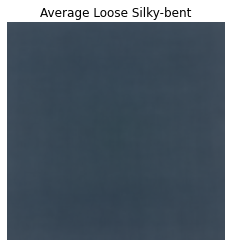

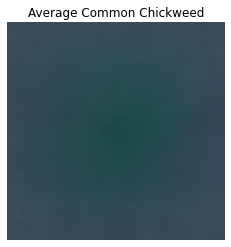

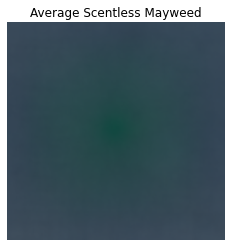

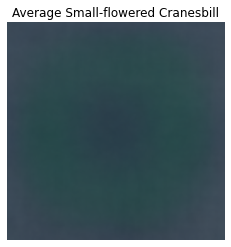

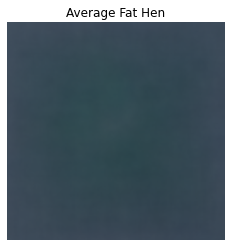

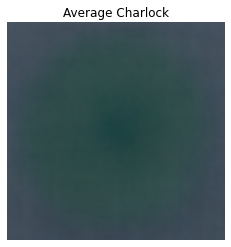

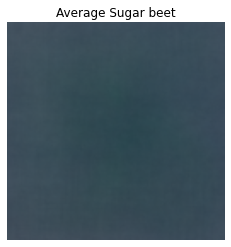

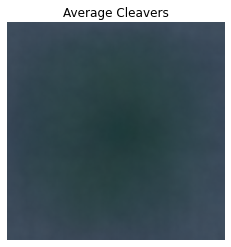

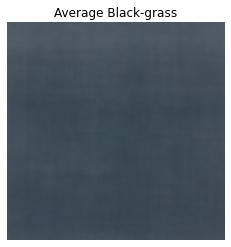

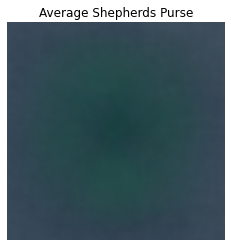

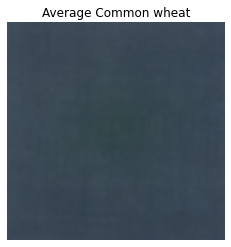

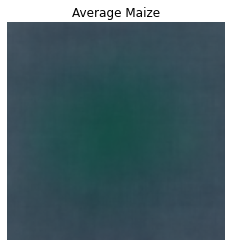

In [10]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    plt.imshow(mean_img/255.0, cmap='gray')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

Loose_Silky_bent_mean = find_mean_img(Loose_Silky_bent_imgs, 'Loose Silky-bent')
Common_Chickweed_mean = find_mean_img(Common_Chickweed_imgs, 'Common Chickweed')
Scentless_Mayweed_mean = find_mean_img(Scentless_Mayweed_imgs, 'Scentless Mayweed')
Small_flowered_Cranesbill_mean = find_mean_img(Small_flowered_Cranesbill_imgs, 'Small-flowered Cranesbill')
Fat_Hen_mean = find_mean_img(Fat_Hen_imgs, 'Fat Hen')
Charlock_mean = find_mean_img(Charlock_imgs, 'Charlock')
Sugar_beet_mean = find_mean_img(Sugar_beet_imgs, 'Sugar beet')
Cleavers_mean = find_mean_img(Cleavers_imgs, 'Cleavers')
Black_grass_mean = find_mean_img(Black_grass_imgs, 'Black-grass')
Shepherds_Purse_mean = find_mean_img(Shepherds_Purse_imgs, 'Shepherds Purse')
Common_wheat_mean = find_mean_img(Common_wheat_imgs, 'Common wheat')
Maize_mean = find_mean_img(Maize_imgs, 'Maize')

#### **Converting to Greyscale**

In [11]:
i = 0
images_grey = []
while i < images.shape[0]:
  images_grey.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
  i += 1

In [12]:
images_grey = np.array(images_grey)

In [13]:
images_grey.shape

(4750, 128, 128)

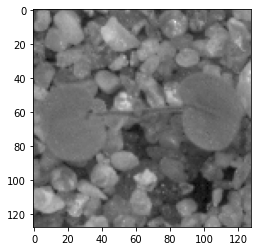

In [14]:
plt.imshow(images_grey[0], cmap='gray')

### **Data Preprocessing** 

In [15]:
# LabelEncoder class values as integers
labels = np.ravel(labels)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(labels)
label_encoded_y = label_encoder.transform(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images,label_encoded_y, test_size=0.2, random_state=35,stratify=label_encoded_y)

#### **Gaussian Blurring in Pre-Processing**

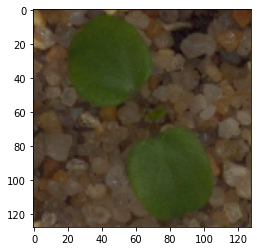

In [17]:
plt.imshow(cv2.cvtColor(X_train[5], cv2.COLOR_BGR2RGB))

In [18]:
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [19]:
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

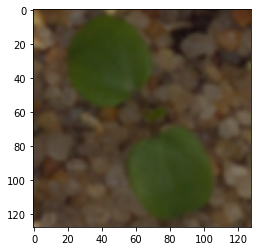

In [20]:
plt.imshow(cv2.cvtColor(X_train[5], cv2.COLOR_BGR2RGB))

#### **Normalization**
- We perform a grayscale normalization to reduce the effect of illumination's differences.

In [21]:
# Normalize the data
X_train = X_train/255
X_test = X_test/255

#### **One-Hot Encoding**

In [22]:
encoded = to_categorical(y_train,12)
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test),12)
y_test_e=encoded_test

In [23]:
print(y_train_e.shape)
print(y_test_e.shape)

(3800, 12)
(950, 12)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [24]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [25]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 500)               24576500  
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 12)                8412      
                                                                 
Total params: 24,935,612
Trainable params: 24,935,612
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
46/48 [===========================>..] - ETA: 0s - loss: 9.2719 - accuracy: 0.1135
Epoch 1: val_accuracy improved from -inf to 0.13421, saving model to best_model.h5
48/48 [==============================] - 3s 39ms/step - loss: 9.0635 - accuracy: 0.1122 - val_loss: 2.4001 - val_accuracy: 0.1342
Epoch 2/200
48/48 [==============================] - ETA: 0s - loss: 2.3571 - accuracy: 0.1859
Epoch 2: val_accuracy improved from 0.13421 to 0.17237, saving model to best_model.h5
48/48 [==============================] - 1s 26ms/step - loss: 2.3571 - accuracy: 0.1859 - val_loss: 2.2346 - val_accuracy: 0.1724
Epoch 3/200
47/48 [============================>.] - ETA: 0s - loss: 2.1242 - accuracy: 0.2480
Epoch 3: val_accuracy improved from 0.17237 to 0.26316, saving model to best_model.h5
48/48 [==============================] - 2s 40ms/step - loss: 2.1237 - accuracy: 0.2480 - val_loss: 2.1455 - val_accuracy: 0.2632
Epoch 4/200
44/48 [==========================>...] - ETA: 0s - loss: 2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


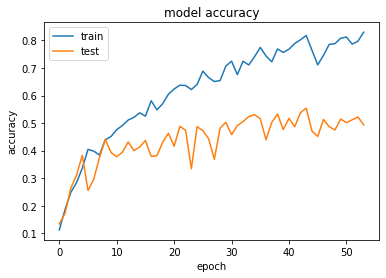

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [28]:
import numpy
model_ann.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 5ms/step - loss: 2.0512 - accuracy: 0.5347


[2.0512237548828125, 0.5347368717193604]

As we see here, the **ANN does not show a good test accuracy**, since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
CNNs tend to behave well on image data but the important point to consider is, it may not be true until an optimized CNN is built depending on the data.

#### **Convolutional Neural Network (CNN)**

**Model 1:** CNN with Dropout

In [29]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64


history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=100, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 2.4446 - accuracy: 0.1240
Epoch 1: val_accuracy improved from -inf to 0.08816, saving model to best_model.h5
48/48 [==============================] - 6s 69ms/step - loss: 2.4446 - accuracy: 0.1240 - val_loss: 2.4357 - val_accuracy: 0.0882
Epoch 2/100
47/48 [============================>.] - ETA: 0s - loss: 2.4177 - accuracy: 0.1363
Epoch 2: val_accuracy improved from 0.08816 to 0.11447, saving model to best_model.h5
48/48 [==============================] - 3s 54ms/step - loss: 2.4189 - accuracy: 0.1352 - val_loss: 2.4270 - val_accuracy: 0.1145
Epoch 3/100
47/48 [============================>.] - ETA: 0s - loss: 2.4003 - accuracy: 0.1483
Epoch 3: val_accuracy improved from 0.11447 to 0.18289, saving model to best_model.h5
48/48 [==============================] - 3s 54ms/step - loss: 2.4008 - accuracy: 0.1484 - val_loss: 2.4343 - val_accuracy: 0.1829
Epoch 4/100
47/48 [============================>.] - ETA: 0s - loss: 2

In [30]:
model.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 13ms/step - loss: 0.7189 - accuracy: 0.8200


[0.7189365029335022, 0.8199999928474426]

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively 

Since CNN Model 1 appear to have good test accuracy, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [31]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [32]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 8)       0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        3216      
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=100,callbacks=[es,mc])

Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 2.5549 - accuracy: 0.0991
Epoch 1: val_accuracy improved from -inf to 0.11842, saving model to best_model.h5
14/14 [==============================] - 2s 84ms/step - loss: 2.5549 - accuracy: 0.0991 - val_loss: 2.4762 - val_accuracy: 0.1184
Epoch 2/100
13/14 [==========================>...] - ETA: 0s - loss: 2.4584 - accuracy: 0.1166
Epoch 2: val_accuracy did not improve from 0.11842
14/14 [==============================] - 1s 49ms/step - loss: 2.4577 - accuracy: 0.1158 - val_loss: 2.4555 - val_accuracy: 0.0842
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 2.4468 - accuracy: 0.1146
Epoch 3: val_accuracy did not improve from 0.11842
14/14 [==============================] - 1s 52ms/step - loss: 2.4468 - accuracy: 0.1146 - val_loss: 2.4518 - val_accuracy: 0.0974
Epoch 4/100
13/14 [==========================>...] - ETA: 0s - loss: 2.4326 - accuracy: 0.1460
Epoch 4: val_accuracy improved from 0.11842 t

In [34]:
model_ln3.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 6ms/step - loss: 2.5085 - accuracy: 0.3189


[2.508519411087036, 0.31894737482070923]

This model unfortunately **does not have a good test accuracy as compared Model 1 accuracy** 

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [35]:
lr = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 8)       0         
                                                                 
 dropout_10 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        3216      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=100,callbacks=[es,mc])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 2.7145 - accuracy: 0.1079
Epoch 1: val_accuracy improved from -inf to 0.11316, saving model to best_model.h5
7/7 [==============================] - 3s 239ms/step - loss: 2.7145 - accuracy: 0.1079 - val_loss: 2.4651 - val_accuracy: 0.1132
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 2.4370 - accuracy: 0.1404
Epoch 2: val_accuracy improved from 0.11316 to 0.12895, saving model to best_model.h5
7/7 [==============================] - 1s 139ms/step - loss: 2.4370 - accuracy: 0.1404 - val_loss: 2.4376 - val_accuracy: 0.1289
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 2.3937 - accuracy: 0.1637
Epoch 3: val_accuracy did not improve from 0.12895
7/7 [==============================] - 1s 102ms/step - loss: 2.3937 - accuracy: 0.1637 - val_loss: 2.3939 - val_accuracy: 0.1158
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 2.3113 - accuracy: 0.1763
Epoch 4: val_accuracy

In [37]:
model_ln4.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 6ms/step - loss: 1.6633 - accuracy: 0.5958


[1.6632752418518066, 0.5957894921302795]

#### **Convolutional Neural Network (CNN)**

**Model 4:** CNN with Dropout using Data Augmentation

**Data Augmentation**

In [38]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
    )

In [39]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)

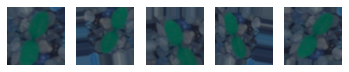

In [41]:
#Augmented Images
gen = train_datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model5 = Sequential()
#
y_train=np.array(y_train)
model5.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
#
model5.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.25))
#
model5.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.3))
#
model5.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.3))

#
model5.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.3))

# 
model5.add(Flatten())
model5.add(Dense(1024, activation = "relu"))
model5.add(Dropout(0.5))
model5.add(Dense(12, activation = "softmax"))
optimizer5 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model5.compile(optimizer = optimizer5 , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs5 = 200  
batch_size5 = 64


history5=model5.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=epochs5, #number of iterations over the entire dataset to train on
          batch_size=batch_size5,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
47/48 [============================>.] - ETA: 0s - loss: 2.4325 - accuracy: 0.1267
Epoch 1: val_accuracy improved from -inf to 0.14737, saving model to best_model.h5
48/48 [==============================] - 4s 63ms/step - loss: 2.4325 - accuracy: 0.1273 - val_loss: 2.4425 - val_accuracy: 0.1474
Epoch 2/200
47/48 [============================>.] - ETA: 0s - loss: 2.3449 - accuracy: 0.1872
Epoch 2: val_accuracy improved from 0.14737 to 0.32763, saving model to best_model.h5
48/48 [==============================] - 3s 53ms/step - loss: 2.3417 - accuracy: 0.1891 - val_loss: 2.1361 - val_accuracy: 0.3276
Epoch 3/200
48/48 [==============================] - ETA: 0s - loss: 1.8262 - accuracy: 0.3750
Epoch 3: val_accuracy improved from 0.32763 to 0.38553, saving model to best_model.h5
48/48 [==============================] - 3s 55ms/step - loss: 1.8262 - accuracy: 0.3750 - val_loss: 1.7299 - val_accuracy: 0.3855
Epoch 4/200
47/48 [============================>.] - ETA: 0s - loss: 1

In [43]:
model5.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 11ms/step - loss: 0.7037 - accuracy: 0.8095


[0.7036797404289246, 0.8094736933708191]

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

### **Plotting the Train & Validation Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


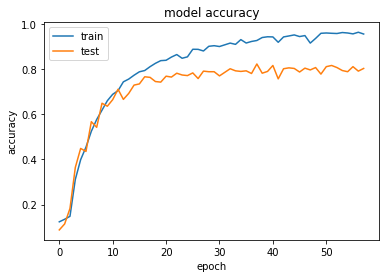

In [44]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


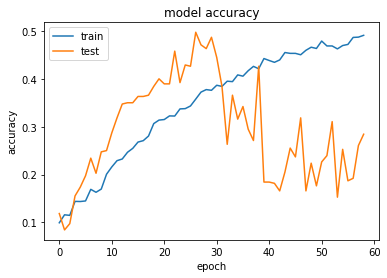

In [45]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


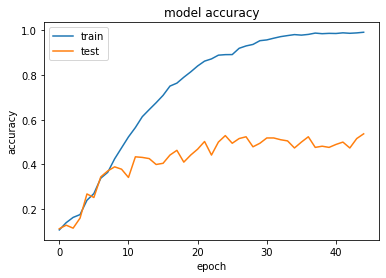

In [46]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 4**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


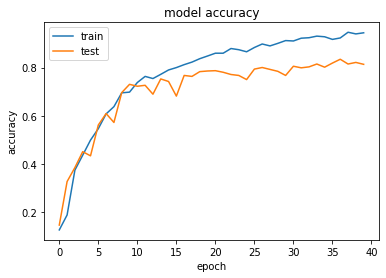

In [47]:
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Model Evaluation**

**CNN Model 1**

In [48]:
model.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 11ms/step - loss: 0.7189 - accuracy: 0.8200


[0.7189365029335022, 0.8199999928474426]

**CNN Model 2**

In [49]:
model_ln3.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 6ms/step - loss: 2.5085 - accuracy: 0.3189


[2.508519411087036, 0.31894737482070923]

**CNN Model 3**

In [50]:
model_ln4.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 6ms/step - loss: 1.6633 - accuracy: 0.5958


[1.6632752418518066, 0.5957894921302795]

**CNN Model 4**

In [51]:
model5.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 11ms/step - loss: 0.7037 - accuracy: 0.8095


[0.7036797404289246, 0.8094736933708191]

Unfortunately, **we cannot decide the best model based on only test accuracy here**  so we are more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, we will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 1 and Model 4 seem to be generalizing well** because they both have a good Holdout set Accuracy. **Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 1**

In [52]:
# Test Prediction 
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_pred_prob = np.max(y_test_pred, axis=1)


In [53]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes)



0.82

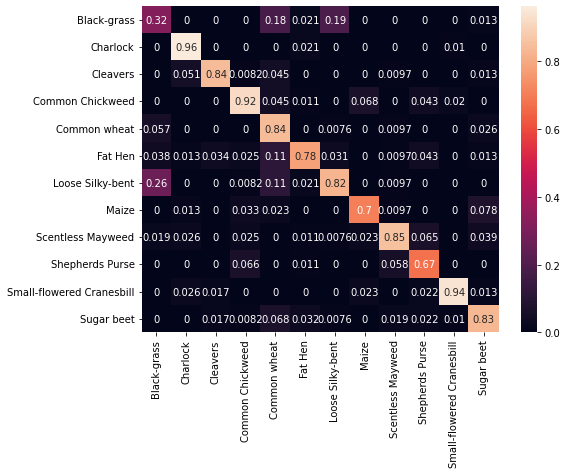

In [54]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True)

**CNN Model 2**

In [55]:
# Test Prediction 
y_test_pred_ln3 = model_ln3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)


In [56]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln3)



0.31894736842105265

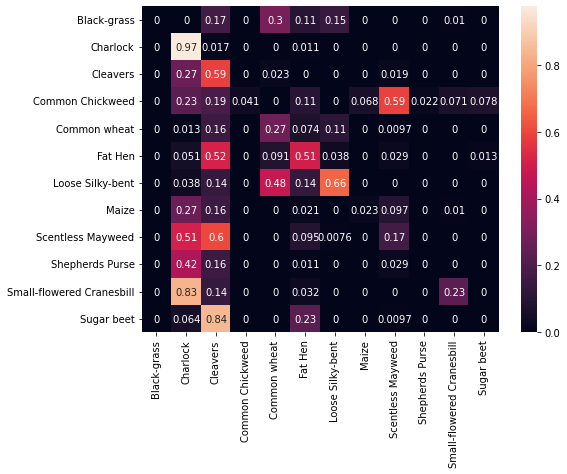

In [57]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True)

**CNN Model 3**

In [58]:
#Test Prediction 

y_test_pred_ln4 = model_ln4.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)


In [59]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln4)



0.5957894736842105

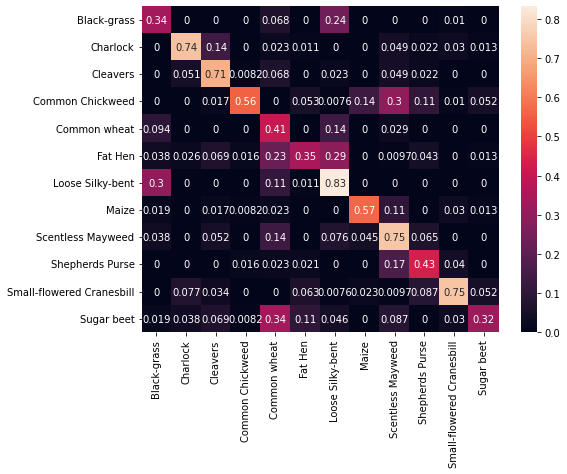

In [60]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True)

**CNN Model 4**

In [61]:
#Test Prediction 

y_test_pred5 = model5.predict(X_test)
y_test_pred_classes5 = np.argmax(y_test_pred5, axis=1)
y_test_pred_prob5 = np.max(y_test_pred5, axis=1)


In [62]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes5)



0.8094736842105263

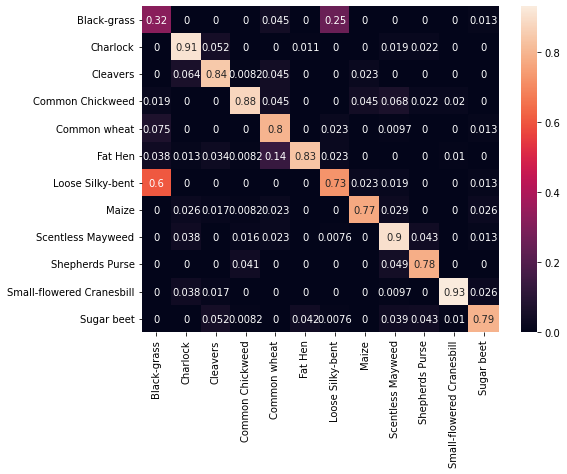

In [63]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes5)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True)

The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- 'Black-grass', 
- 'Charlock', 
- 'Cleavers', 
- 'Common Chickweed',
- 'Common wheat',
- 'Fat Hen',
- 'Loose Silky-bent',
- 'Maize',
- 'Scentless Mayweed',
- 'Shepherds Purse',
- 'Small-flowered Cranesbill',
- 'Sugar beet'



**CNN Model 1**

In [64]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.45945946 0.88235294 0.9245283  0.84210526 0.58730159 0.86046512
 0.77142857 0.86111111 0.87128713 0.775      0.95876289 0.81012658]
 Recall is [0.32075472 0.96153846 0.84482759 0.91803279 0.84090909 0.77894737
 0.82442748 0.70454545 0.85436893 0.67391304 0.93939394 0.83116883] 
 f_beta Score is [0.37777778 0.9202454  0.88288288 0.87843137 0.69158879 0.81767956
 0.79704797 0.775      0.8627451  0.72093023 0.94897959 0.82051282]


**CNN Model 2**

In [65]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln3, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.         0.26480836 0.15962441 1.         0.23529412 0.38095238
 0.688      0.25       0.18181818 0.         0.71875    0.        ]
 Recall is [0.         0.97435897 0.5862069  0.04098361 0.27272727 0.50526316
 0.65648855 0.02272727 0.17475728 0.         0.23232323 0.        ] 
 f_beta Score is [0.         0.41643836 0.25092251 0.07874016 0.25263158 0.43438914
 0.671875   0.04166667 0.17821782 0.         0.35114504 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**CNN Model 3**

In [66]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.4        0.79452055 0.640625   0.90666667 0.28571429 0.56896552
 0.50230415 0.73529412 0.48125    0.55555556 0.83146067 0.69444444]
 Recall is [0.33962264 0.74358974 0.70689655 0.55737705 0.40909091 0.34736842
 0.83206107 0.56818182 0.74757282 0.43478261 0.74747475 0.32467532] 
 f_beta Score is [0.36734694 0.76821192 0.67213115 0.69035533 0.3364486  0.43137255
 0.62643678 0.64102564 0.58555133 0.48780488 0.78723404 0.44247788]


**CNN Model 4**

In [67]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes5, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.30357143 0.83529412 0.83050847 0.90677966 0.71428571 0.94047619
 0.69852941 0.89473684 0.78813559 0.85714286 0.95833333 0.88405797]
 Recall is [0.32075472 0.91025641 0.84482759 0.87704918 0.79545455 0.83157895
 0.72519084 0.77272727 0.90291262 0.7826087  0.92929293 0.79220779] 
 f_beta Score is [0.31192661 0.87116564 0.83760684 0.89166667 0.75268817 0.88268156
 0.71161049 0.82926829 0.84162896 0.81818182 0.94358974 0.83561644]


**Model 3 (Best) Observation**

As we see from the precision for each class, the **'Small-flowered Cranesbill'** classifier has the highest precision.

**'Black-grass' not identified correctly**. But it is works well for the other scenario, where the model is able to correctly identifying plants. 

We need to optimize more of our model and also need better sample for 'Black-grass'.

---



### **Weighted F-Score**

**Model 1**

In [68]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes, average='weighted')

0.8167936307765148

**Model 2**

In [69]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln3, average='weighted')

0.2652563232457636

**Model 3**

In [70]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln4, average='weighted')

0.5930601363932563

**Model 4**

In [71]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes5, average='weighted')

0.8111698567329887

Model 1 has same F1 score as Model 4.

### **Prediction**

Let us predict with best model with is Model 4

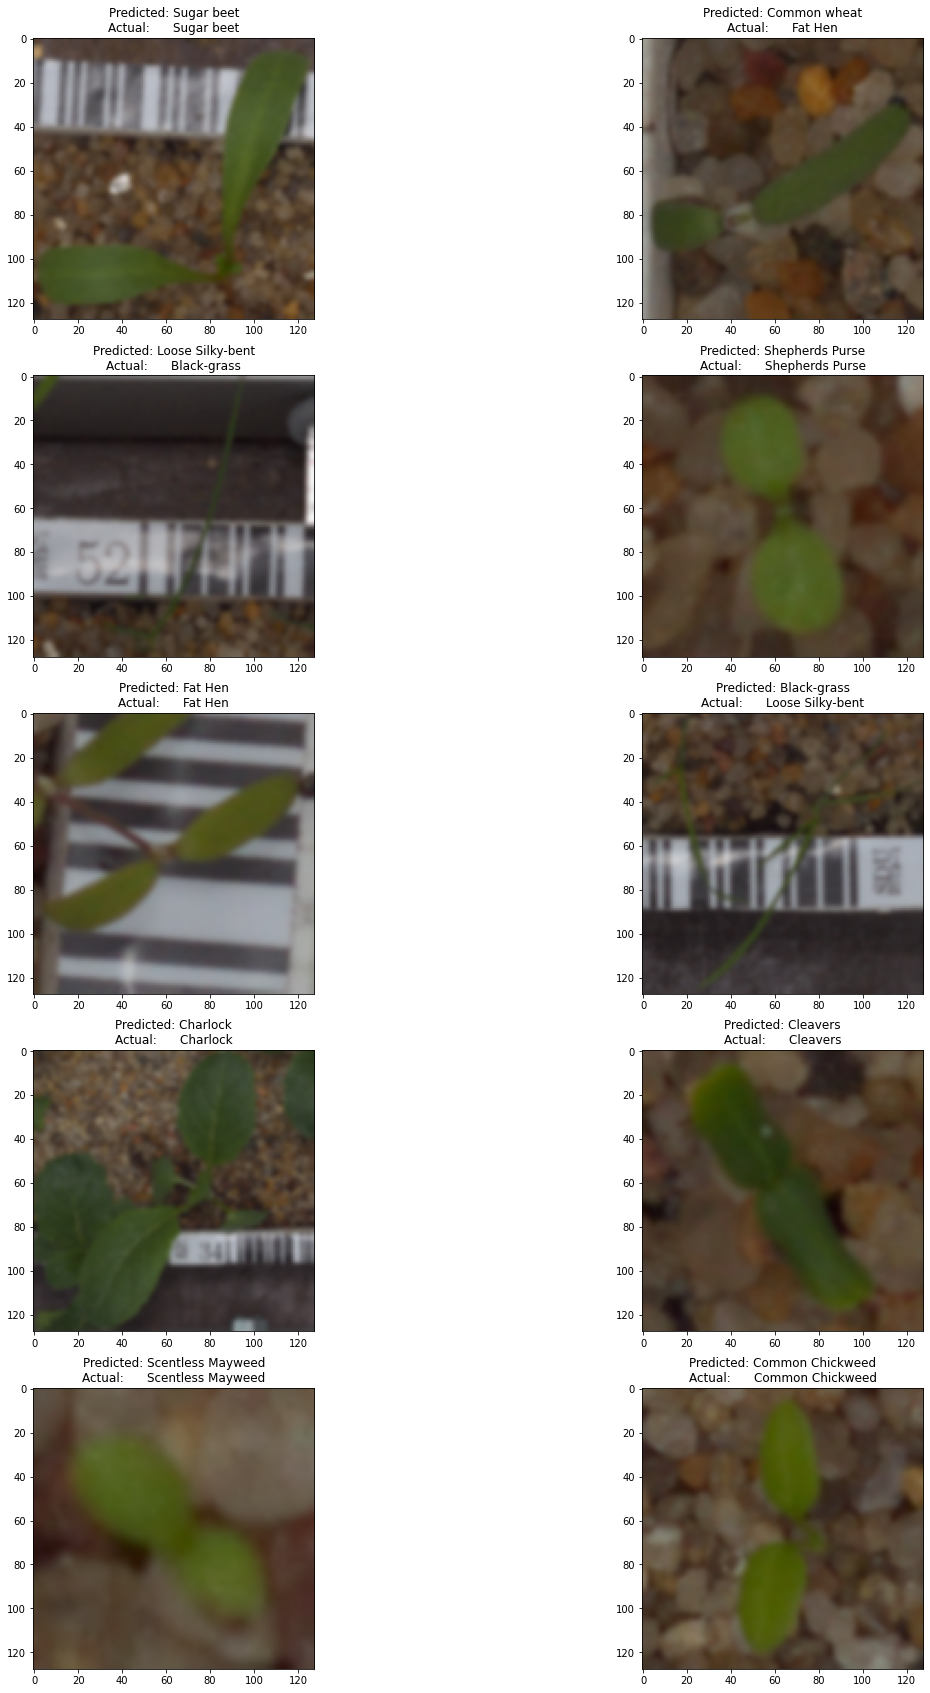

In [72]:
fig, axs = plt.subplots(5,2, figsize = (20,30))
axs = axs.ravel()
for i in range(10):
  res=model5.predict(X_test[i].reshape(1,128,128,3),)
  pred_cat=np.argmax(res)
  predStr = label_encoder.classes_[pred_cat]

  axs[i].imshow(cv2.cvtColor((X_test[i]*255).astype('uint8'), cv2.COLOR_BGR2RGB))
  acc_cat=label_encoder.classes_[y_test[i]]
  axs[i].set_title('Predicted: ' + predStr + '\n' + 'Actual:      ' + acc_cat)

### **Conclusion**

As we have seen, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better plant seedlings classifier. 

We can visualize the filters  and understand why the model does not do well in the identification of the plant seedlings.
